## PyTorch Computer Vision

* See reference notebook: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb
* For full documentation: https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer vision libraries in PyTorch

*  `torchvision`- https://www.learnpytorch.io/03_pytorch_computer_vision/ -base domain library for computer vision
*  `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transform` - function for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataest

In [2]:
#import Pytorch
import torch
from torch import nn

#torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#Import matplotlib for visualization
import matplotlib.pyplot as plt

#check version
print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


## 1. Getting a dataset

the dataset for this notebook is `FasionMNIST` (https://pytorch.org/vision/main/datasets.html)

In [3]:
#Setup training data
train_data=datasets.FashionMNIST(
    root="data", #where to download data to
    train=True, #do we want the training data set
    download=True, #do we want to download it
    transform=ToTensor(), #torchvision.transforms.ToTensor() how to transform the data
    target_transform=None #how to transfrorm the labels/targets?
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12696594.17it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 211986.25it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:06<00:00, 672835.71it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18144770.58it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data),len(test_data)

(60000, 10000)

In [5]:
# see first training example
image, label=train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
print(f"Image shape: {image.shape}->[color_chanels,height,width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28])->[color_chanels,height,width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

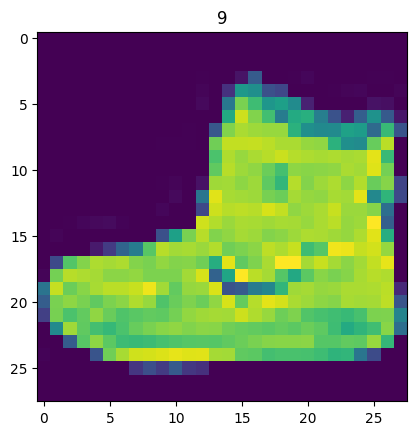

In [9]:
import matplotlib.pyplot as plt
image, label=train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

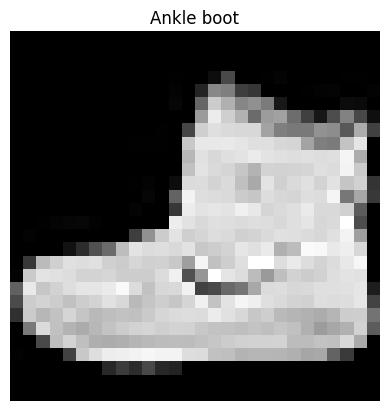

In [10]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

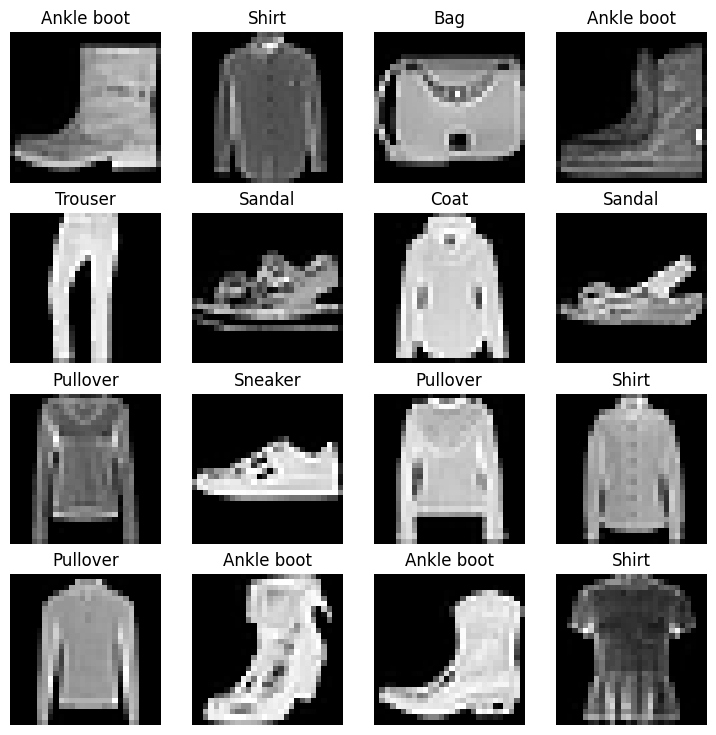

In [11]:
# Plot moe images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  #print(random_idx)
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines? Or do we need non-linearity

## 2. Prepare DataLoader

Right now, our data is in the form PyTorch Datasets.

DataLoader turns dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why is this necessary?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images ata time (32 batch size).

2. It gives our neural network more chances to update its gradients per epoch

For more on mini-batches see here: https://www.youtube.com/watch?v=4qJaSmvhxi8


In [12]:
from torch.utils.data import DataLoader

#setup the batch size hyperparameter
BATCH_SIZE=32

#Turn datasets  in iterables
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)


train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x788e6de26f80>,
 <torch.utils.data.dataloader.DataLoader at 0x788e6de24040>)

In [13]:
# Let's check out what been created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of the train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of the test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x788e6de26f80>, <torch.utils.data.dataloader.DataLoader object at 0x788e6de24040>)
Length of the train_dataloader: 1875 batches of 32
Length of the test_dataloader: 313 batches of 32


In [14]:
#len(train_data)/32 = 1875.0

#check out what's inside the dataloader
train_features_batch, train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


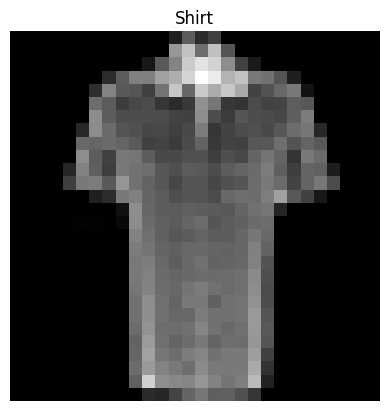

In [15]:
#show sample
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When builging a series of ML modelling experiments, it's best to build a baseline model.

A baseline is a simple model you try to improve upon with subsequent models/experiments.label

In other words we start simple and add complexitiy as needed.

In [16]:
#create a flatten later
flatten_model=nn.Flatten()

#het a single sample
x=train_features_batch[0]


#flatten the sample
output=flatten_model(x) #perform forward pass

#print what happening
print(f"Shape before flats: {x.shape} ->[color_chanels, height, width]")
print(f"Shape after flats: {output.shape} ->[color_chanels, height*width]")

Shape before flats: torch.Size([1, 28, 28]) ->[color_chanels, height, width]
Shape after flats: torch.Size([1, 784]) ->[color_chanels, height*width]


In [17]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
              input_shape: int,
              hidden_units: int,
              output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(nn.Flatten(),
                                   nn.Linear(in_features=input_shape,
                                             out_features=hidden_units),
                                   nn.Linear(in_features=hidden_units,
                                             out_features=output_shape)

                                   )

  def forward(self,x):
    return self.layer_stack(x)



In [18]:
torch.manual_seed(42)

#setup model with input parameters
model_0=FashionMNISTModelV0(
    input_shape=784, #this is width*height or nn.Flatten
    hidden_units=10,#how many units in the hidden layer
    output_shape=len(class_names)#one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

## 3.1 Setup loss, optimizer and evaluation metrics

* Loss function- since we're working with multi-class data, our loss function will be `mm.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on classification problem, lets use accuracy as our evaluation metric

In [20]:
import requests
from pathlib import Path

#download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")

else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [21]:
# import accuracy metric
#import helper_functions
#from helper_functions import accuracy_fn

#setup loss function and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)



In [22]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from torch import nn

import os
import zipfile

from pathlib import Path

import requests

# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

accuracy_fn

<function __main__.accuracy_fn(y_true, y_pred)>

### 3.2 Creating a function to time our experiments

ML is very experiemental.

Two of the main things you'll want to track are:
1. Model's performance (loss and accuracy values etc)'
2. How fast it runs

In [23]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device: torch.device=None):

  """Prints difference between start and end time."""
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [24]:
start_time=timer()
#some code..
end_time=timer()
print_train_time(start=start_time, end=end_time,device="cpu")

Train time on cpu: 0.000 seconds


5.4887000004555375e-05

### 3.3 Creating a traing loop and trainig a model on batches of data
#Highlihght that the optimizer will update a model's parameters once per batch

1. Loop through epochs.
2. Loop through training batches, perform training steops, calculate the train loss *per batch*
3. Loop though testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. Time it all (not necessary)

In [25]:
#import tqdm for progress bar
from tqdm.auto import tqdm

#set the seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu=timer()

#set the number of epochs (we'll keep this small for faster training time)
epochs=3

#Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ##training
  train_loss=0
  #add a loop to loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    #1. Forward pass
    y_pred=model_0(X)

    #2. Calculate loss (per batch)
    loss=loss_fn(y_pred,y)
    train_loss +=loss #accumulate rain loss

    #3. optimiz the zero grad
    optimizer.zero_grad()

    #4. Loss backwards
    loss.backward()

    #5.optimizter step
    optimizer.step()

    #print out what's happening
    if batch%400==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)}samples.")

  # Divide total train loss by length of train dataloader
  train_loss /=len(train_dataloader)


  ####Testing loop
  test_loss, test_acc =0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #1. forward pass
      test_pred=model_0(X_test)

      #2 calculate the loss (accumultively)
      test_loss += loss_fn(test_pred, y_test)

      #3. Accuray
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    #calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    #calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  ##print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.5f}")

#calculate training time

train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,
                                          end=train_time_end_on_cpu,
                                          device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000samples.
Looked at 12800/60000samples.
Looked at 25600/60000samples.
Looked at 38400/60000samples.
Looked at 51200/60000samples.

Train loss: 0.5904 | Test loss: 0.5102, Test acc: 82.03874
Epoch: 1
------
Looked at 0/60000samples.
Looked at 12800/60000samples.
Looked at 25600/60000samples.
Looked at 38400/60000samples.
Looked at 51200/60000samples.

Train loss: 0.4743 | Test loss: 0.5268, Test acc: 81.67931
Epoch: 2
------
Looked at 0/60000samples.
Looked at 12800/60000samples.
Looked at 25600/60000samples.
Looked at 38400/60000samples.
Looked at 51200/60000samples.

Train loss: 0.4537 | Test loss: 0.5126, Test acc: 82.99720
Train time on cpu: 68.079 seconds


## 4. Make predictions and get model 0 results

In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [27]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model prediciting on data loader."""

  loss, acc =0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      #agnostic code
      X, y=X.to(device),y.to(device)
      #make predictions
      y_pred=model(X)

      #accumulate the loss and acc values per batch

      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,
                       y_pred=y_pred.argmax(dim=1))

    #scale loss and acc to find average loss/acc per batch
    loss/=len(data_loader)
    acc/=len(data_loader)

    return {"model_name": model.__class__.__name__, #only works when model created with a class
            "model_loss":loss.item(),
            "model_acc":acc}

#calculate model 0 results on test dataset
model_0_results=eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                           device=device)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [28]:
#set up device agnostic code
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Bulding a better model with non-linearity

We learned about the power of non-linearity: https://www.learnpytorch.io/02_pytorch_classification/

In [29]:
#Create a model with non-linear and linear layer
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(), #flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [30]:
#create an instance of model 1
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=784, #output of flatten layer e.g 28*28
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cpu')

### 6.1 Setup loss, optimizer and evaluation metrics

In [31]:
#create loss function and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(), #tries to update model's parameters to reduce the loss
                          lr=0.1)


### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* training loop - `train_step()
* testing loop - `test_step()

In [32]:
def train_step(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):

  """Performs a training with model tryinh to learn on data_loader"""

  train_loss, train_acc=0,0

  ##training##

  #put model into training mode
  model.train()

  #add a loop to loop through training batches
  for batch, (X,y) in enumerate(data_loader):
    model.train()
    #1. Forward pass
    y_pred=model(X)

    #2. Calculate loss and acc (per batch)
    loss=loss_fn(y_pred,y)
    train_loss +=loss #accumulate rain loss
    train_acc +=accuracy_fn(y_true=y,
                            y_pred=y_pred.argmax(dim=1)) #go from logits to prediction labels

    #3. optimiz the zero grad
    optimizer.zero_grad()

    #4. Loss backwards
    loss.backward()

    #5.optimizter step
    optimizer.step()


  # Divide total train loss by length of train dataloader
  train_loss /=len(data_loader)
  train_acc /=len(data_loader)#

  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.5f}")

In [33]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):

  """Performs testing loop step on model going over data_loader."""
  ####Testing loop
  test_loss, test_acc =0,0
  #put in eval mode
  model.eval()
  #turn on inference mode
  with torch.inference_mode():
    for X_test,y_test in data_loader:

      #sedn to device
      X_test, y_test=X_test.to(device),y_test.to(device)
      #1. forward pass
      test_pred=model(X_test)

      #2 calculate the loss (accumultively)
      test_loss += loss_fn(test_pred, y_test)

      #3. Accuray
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    #calculate the test loss average per batch
    test_loss /= len(data_loader)

    #calculate the test acc average per batch
    test_acc /= len(data_loader)

  ##print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.5f}")

In [34]:
#set the seed and start timer
torch.manual_seed(42)
#measure time
train_time_start_on_cpu=timer()

#set the number of epochs (we'll keep this small for faster training time)
epochs=3

#Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ##training
  train_step(model=model_1,
            data_loader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_cpu=timer()

total_train_time_model_1=print_train_time(start=train_time_start_on_cpu,
                                          end=train_time_end_on_cpu,
                                          device=device)





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 1.09199 | Train acc: 61.34333

Train loss: 0.4537 | Test loss: 0.9569, Test acc: 64.97604
Epoch: 1
------
Train loss: 0.73779 | Train acc: 73.69333

Train loss: 0.4537 | Test loss: 0.7239, Test acc: 74.21126
Epoch: 2
------
Train loss: 0.66776 | Train acc: 76.07667

Train loss: 0.4537 | Test loss: 0.6875, Test acc: 75.63898
Train time on cpu: 41.027 seconds


**Note:** Sometimes, depending on on your model/hardware you'll notice your model trains faster on CPU than GPU.

Why?

1. It could be the overhead for copying data/model to and from the GPU outwighs the compute benifits offered by the GPU.
2. The hardware you're using has a better CPU in terms compute capability than the GPU

Link: https://horace.io/brrr_intro.html

In [35]:
# Get model_1 results dictionary
model_1_results=eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.687465250492096,
 'model_acc': 75.64896166134186}

In [36]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are known as ConvNets.

CNN's are known for the capabilities to find patterns in visual data.

To find out and better illustrate a CNN see here: https://poloclub.github.io/cnn-explainer/

In [37]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TingVGG
  model from CNN explainer website (please see website to understand each step in nn.sequential)
  """
  def __init__(self, input_shape: int,hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), #values we can set ourselves in NN are our hypermarameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, #there's a trick to calculating this
                  out_features=output_shape)
    )

  def forward(self, x):
    x =self.conv_block_1(x)
    #print(f"Out put shape of conv_block_1: {x.shape}")
    x=self.conv_block_2(x)
    #print(f"Out put shape of conv_block_2: {x.shape}")
    x=self.classifier(x)
    return x

In [38]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1, #colour channel as oppos to model 0 and 1
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

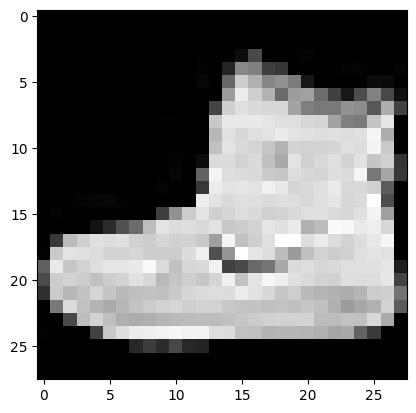

In [39]:
plt.imshow(image.squeeze(),cmap="gray")

In [40]:
rand_image_tensor=torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [41]:
model_2(rand_image_tensor.unsqueeze(0).to(device)) # compressed by Maxpool layer torch.Size([10, 14, 14]) compressed by maxpool 2 layer torch.Size([10, 7, 7])

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d`

See documentation for `nn.Conv2d` here: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [42]:
torch.manual_seed(42)

#create a batch of images
images=torch.randn(size=(32,3,64,64))
test_image=images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [43]:
#Create a single conv2d layer
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=3, # 3 is eqivalent to (3,3) tuple
                     stride=1, #play with values to see change on shape
                     padding=1) #see data science cheat sheet for explanation on kernal, stride and padding

# pass the data through the convolutional layer
conv_output=conv_layer(test_image)
print(f"test output shape: {test_image.shape}")
print(f"Conv_output shape: {conv_output.shape}")
conv_output

test output shape: torch.Size([3, 64, 64])
Conv_output shape: torch.Size([10, 64, 64])


tensor([[[ 1.6446e-01, -6.2518e-01, -7.7713e-01,  ..., -3.2504e-01,
          -3.1604e-01,  4.5352e-01],
         [ 3.5455e-01, -2.8778e-01, -6.0596e-02,  ...,  6.6224e-01,
          -2.3216e-01,  7.7080e-01],
         [-4.5420e-02, -9.8911e-01, -4.0099e-01,  ..., -1.8552e-01,
          -5.7622e-01,  4.2301e-01],
         ...,
         [ 2.9288e-01, -1.4512e-01, -1.1566e-01,  ..., -3.6626e-01,
           3.5645e-01,  2.8384e-01],
         [ 2.0746e-01,  3.6096e-02,  1.5214e-01,  ..., -4.9680e-01,
          -7.2258e-01, -8.3858e-02],
         [-3.2457e-01, -3.2326e-01,  9.5475e-02,  ...,  5.9960e-01,
           3.2819e-01,  3.6604e-01]],

        [[ 1.2406e+00,  2.2794e-01, -1.8362e-01,  ..., -6.3520e-01,
          -7.5413e-01,  4.0612e-01],
         [ 4.1380e-01, -1.0853e+00, -1.6079e+00,  ..., -1.7643e+00,
           2.5263e-01,  3.8844e-01],
         [ 5.3442e-01, -8.2507e-01,  6.3866e-01,  ...,  4.8068e-01,
           8.4869e-01, -1.5706e-01],
         ...,
         [-5.6923e-03, -5

### 7.2 Stepping through `nn.MaxPool2d()`

Please see documentation : https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [44]:
#Print with test_image as above
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")
#don't need the unsqueeze but put in for
#create a sample of nn.MaxPool2d layer
max_pool=nn.MaxPool2d(kernel_size=2)

#pass data through the conv layer
test_image_through_conv=conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

#pass data through the max pool layer
test_image_through_conv_and_max_pool=max_pool(test_image_through_conv)
print(f"Shape after conv and max pool layer: {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after conv and max pool layer: torch.Size([1, 10, 32, 32])


In [45]:
torch.manual_seed(42)
#create a random tensor with a similar number of dimensions to our images
random_tensor=torch.randn(size=(1,1,2,2))
print(f"\n Random tensor:\n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

#create max pool layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

#pass the random tensor through the max pool layer
max_pool_tensor=max_pool_layer(random_tensor)
print(f"\nMan pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


 Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Man pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


###7.3 Setup a loss function and optimizer for model 2

In [46]:
# setup loss function/eval metrics/optimizer

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)

### 7.4 Training and testing `model_2` using our training and testing functions

In [47]:
torch.manual_seed(42)
#torch.suda.manual_seed(42)

#measure the time
from timeit import default_timer as timer
train_time_start_model_2=timer()

#train and test model
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

  train_time_end_model_2=timer()

  total_train_time_model_2=print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train loss: 0.59518 | Train acc: 78.37500

Train loss: 0.4537 | Test loss: 0.3953, Test acc: 85.98243
Train time on cpu: 64.707 seconds
Epoch: 1
----
Train loss: 0.36421 | Train acc: 86.85667

Train loss: 0.4537 | Test loss: 0.3896, Test acc: 86.13219
Train time on cpu: 120.037 seconds
Epoch: 2
----
Train loss: 0.32472 | Train acc: 88.30667

Train loss: 0.4537 | Test loss: 0.3500, Test acc: 87.45008
Train time on cpu: 174.401 seconds


In [48]:
#get model 2 results
model_2_results=eval_model(model=model_2,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3493732511997223,
 'model_acc': 87.47004792332268}

## 8. Compare model results and training time

In [49]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.512530,83.007188
1,FashionMNISTModelV1,0.687465,75.648962
2,FashionMNISTModelV2,0.349373,87.470048


In [50]:
# add training time to results comparision
compare_results["training_time"]=[total_train_time_model_0,
                                  total_train_time_model_1,
                                  total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.512530,83.007188,68.079041
1,FashionMNISTModelV1,0.687465,75.648962,41.026785
2,FashionMNISTModelV2,0.349373,87.470048,174.400665


Text(0, 0.5, 'model')

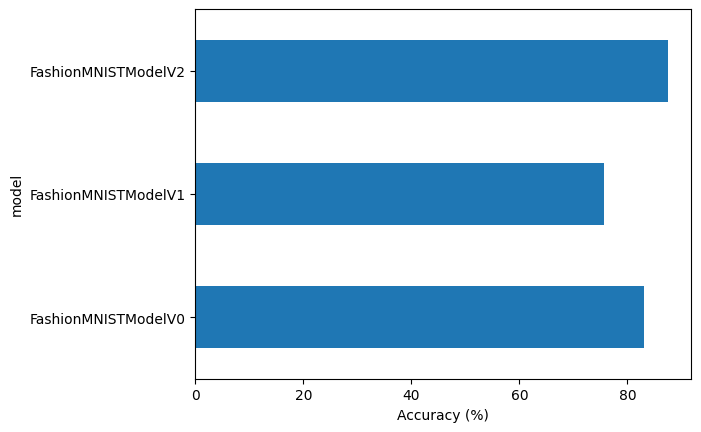

In [51]:
#visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with the best model

In [52]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device:torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare the sample (add a batch dimension and pass to target device)
      sample=torch.unsqueeze(sample, dim=0).to(device)

      #forward pass (model raw logits)
      pred_logit=model(sample)

      #get prediction probability (logit->Predictions probability)
      pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)

      #get pred_prob off GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  #stack pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [53]:
import random
random.seed(42)
test_samples=[]
test_labels=[]

for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)


  #view the first sample shape
  test_samples[0].shape

Text(0.5, 1.0, 'Sandal')

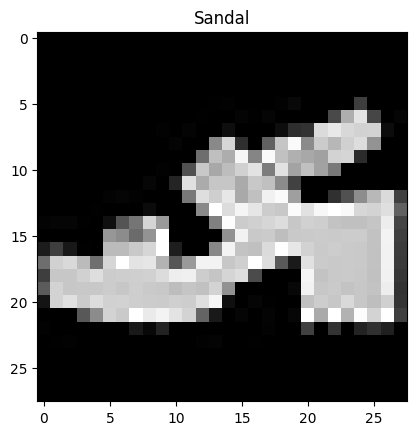

In [54]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [55]:
#make predictions
pred_probs=make_predictions(model=model_2,
                            data=test_samples)

#view first two prediction probabilities
pred_probs[:2]

tensor([[2.7525e-07, 1.3385e-07, 3.3624e-07, 6.1825e-07, 3.5886e-08, 9.9495e-01,
         2.0080e-07, 1.7272e-04, 4.1631e-05, 4.8373e-03],
        [1.0882e-02, 9.1716e-01, 3.1378e-04, 4.5055e-02, 2.0009e-03, 8.8222e-06,
         2.3542e-02, 1.1175e-04, 8.5854e-04, 6.4103e-05]])

In [56]:
#convert prediction probabilities to labels
pred_classes=pred_probs.argmax(dim=1)
pred_classes, test_labels

(tensor([5, 1, 7, 2, 3, 0, 4, 7, 1]), [5, 1, 7, 4, 3, 0, 4, 7, 1])

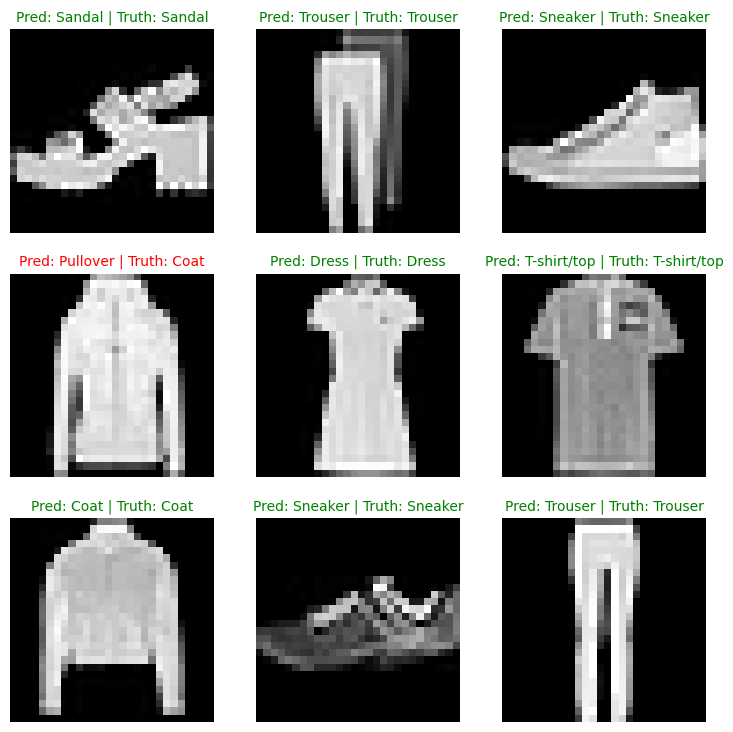

In [57]:
#plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
  #create subplot
  plt.subplot(nrows,ncols,i+1)

  #plot target image
  plt.imshow(sample.squeeze(),cmap="gray")

  #find the prediction (in text form e.g "Tshirt")
  pred_label=class_names[pred_classes[i]]

  #get truth label (in text form)
  truth_label=class_names[test_labels[i]]

  #create a title for the plot

  title_text=f"Pred: {pred_label} | Truth: {truth_label}"

  #check for equality between pred and truth and change colour of title text

  if pred_label==truth_label:
    plt.title(title_text,fontsize=10,c="g") #green if prediction is correct
  else:
    plt.title(title_text,fontsize=10,c="r")

  plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually:https://www.learnpytorch.io/02_pytorch_classification/

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix` -https://torchmetrics.readthedocs.io/en/v0.10.2/classification/confusion_matrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`-https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [58]:
#import mlxtend
#mlxtend.__version__
#import tqdm.auto
from tqdm.auto import tqdm

#1. Make predictions with trained model
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making prediction..."):
    #send data to target device
    X,y=X.to(device),y.to(device)

    #do the forward pass
    y_logits=model_2(X)

    #turn predictions from logits ->prediction probabilities->prediction labels
    y_pred=torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)
    #put predictions on cpu for evalulation
    y_preds.append(y_pred.cpu())

#concatenate list of predictions into tensor
#print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor[:10]


Making prediction...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([2, 7, 4, 6, 7, 1, 0, 7, 2, 9])

In [59]:
#see if required packages are installed and if not install them...
#!pip install torchmetrics
import mlxtend
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version {mlxtend.__version__}")
  assert int(mlxtend.__version__.split("."))[1]>=19,"mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtendimport torchmetrics, mlxtend
  print(f"mlxtend version {mlxtend.__version__}")

ERROR: Invalid requirement: 'torchmetrics,'
mlxtend version 0.22.0


In [60]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 7.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

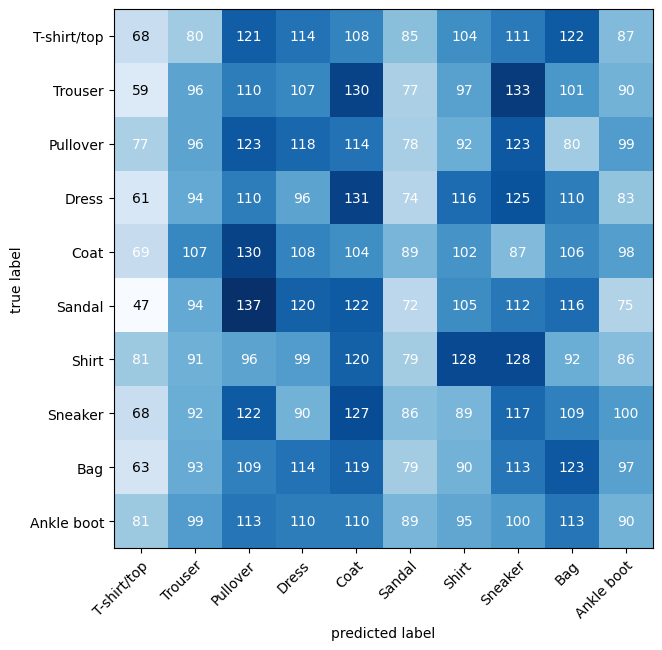

In [61]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. Set up confusion instance and compare predictions to target
confmat=ConfusionMatrix(task='multiclass',
                        num_classes=len(class_names))
confmat_tensor=confmat(preds=y_pred_tensor,
                       target=test_data.targets)

#3. Plot confusion matrix
fig,ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), #matplot prefers working with numpy
    class_names=class_names,
    figsize=(10,7)
)



## 11. Saving and loading best performing model

In [62]:
from pathlib import Path

#1. Create a model directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Model Save Path
MODEL_NAME="03_PyTorch_Computer_Vision_model_2.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#3. Ssave the model
print(f" Saving model to: {MODEL_SAVE_PATH}")
torch.save(model_2.state_dict(),f=MODEL_SAVE_PATH)

 Saving model to: models/03_PyTorch_Computer_Vision_model_2.pth


In [63]:
#Create a new instance of saved model_2
torch.manual_seed(42)

loaded_model_2=FashionMNISTModelV2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(class_names))

#Load in save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [64]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3493732511997223,
 'model_acc': 87.47004792332268}

In [65]:
#evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results=eval_model(model=loaded_model_2,
                                  data_loader=test_dataloader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.349838525056839,
 'model_acc': 87.44009584664536}

In [66]:
#check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02) #up to two decimal places


tensor(True)

## Exercises and self-study

Link: https://www.learnpytorch.io/03_pytorch_computer_vision/

In [67]:
import torch

torch.__version__

device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#### 1. What are 3 areas in industry where computer vision is currently being used?

* Self-driving cars, such as Tesla using computer vision to percieve what's happening on the road. See Tesla AI day for more - https://youtu.be/j0z4FweCy4M
* Healthcare imaging, such as using computer vision to help interpret X-rays. Google also uses computer vision for detecting polyps in the intenstines - https://ai.googleblog.com/2021/08/improved-detection-of-elusive-polyps.html
* Security, computer vision can be used to detect whether someone is invading your home or not - https://store.google.com/au/product/nest_cam_battery?hl=en-GB

#### 2. "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting is like memorizing for a test but then you can't answer a question that's slightly different.

In other words, if a model is overfitting, it's learning the training data too well and these patterns don't generalize to unseen data.

####3. "ways to prevent overfitting in machine learning"

See this article for some ideas: https://elitedatascience.com/overfitting-in-machine-learning

3 ways to prevent overfitting:

1. Regularization techniques - You could use dropout on your neural networks), dropout involves randomly removing neurons in different layers so that the remaining neurons hopefully learn more robust weights/patterns.
2. Use a different model - maybe the model you're using for a specific problem is too complicated, as in, it's learning the data too well because it has so many layers. You could remove some layers to simplify your model. Or you could pick a totally different model altogether, one that may be more suited to your particular problem. Or... you could also use transfer learning (taking the patterns from one model and applying them to your own problem).
3. Reduce noise in data/cleanup dataset/introduce data augmentation techniques - If the model is learning the data too well, it might be just memorizing the data, including the noise. One option would be to remove the noise/clean up the dataset or if this doesn't, you can introduce artificial noise through the use of data augmentation to artificially increase the diversity of your training dataset.

####4. Load the torchvision.datasets.MNIST() train and test datasets. Visualize at least 5 different samples

In [91]:
#import Pytorch
import torch
from torch import nn

#torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#Import matplotlib for visualization
import matplotlib.pyplot as plt

#check version
print(torch.__version__)
print(torchvision.__version__)



2.3.0+cu121
0.18.0+cu121


In [92]:
#Setup training data
train_data=datasets.MNIST(
    root="data", #where to download data to
    train=True, #do we want the training data set
    download=True, #do we want to download it
    transform=ToTensor(), #torchvision.transforms.ToTensor() how to transform the data
    target_transform=None #how to transfrorm the labels/targets?
)

test_data=datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# Data is in tuple form (image, label)
img = train_data[0][0]
label = train_data[0][1]
print(f"Image:\n {img}")
print(f"Label:\n {label}")

print(f"Image shape: {img.shape} -> [color_channels, height, width] (CHW)")
print(f"Label: {label} -> no shape, due to being integer")

Image:
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [93]:
train_data.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

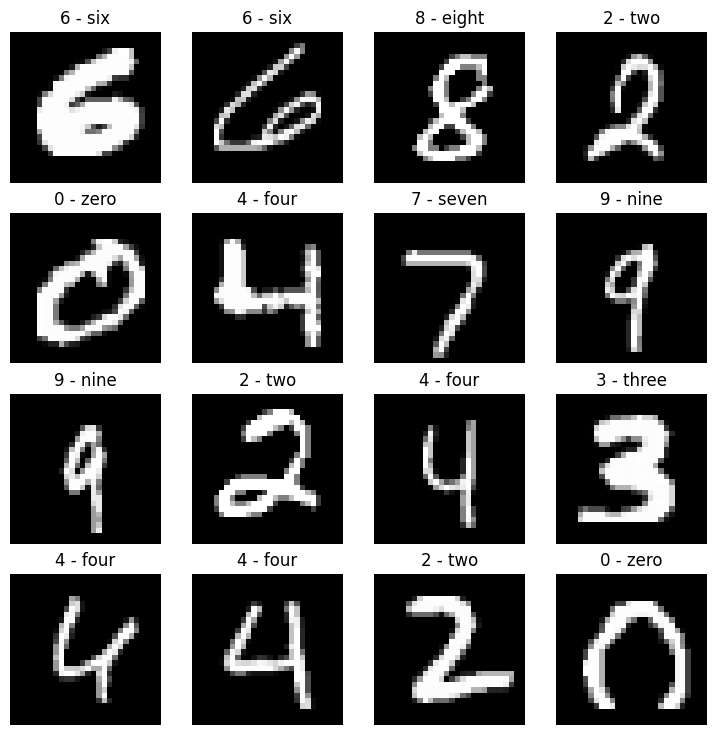

In [94]:
# Plot moe images
torch.manual_seed(42)
class_names=train_data.classes
class_to_idx=train_data.class_to_idx
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  #print(random_idx)
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


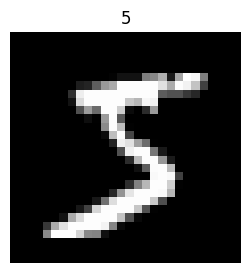

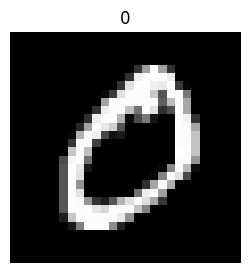

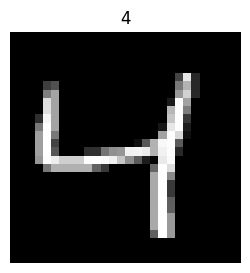

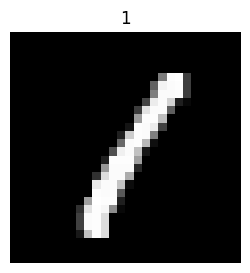

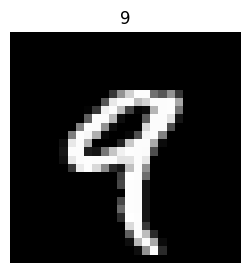

In [95]:
for i in range(5):
  img = train_data[i][0]
  print(img.shape)
  img_squeeze = img.squeeze()
  print(img_squeeze.shape)
  label = train_data[i][1]
  plt.figure(figsize=(3, 3))
  plt.imshow(img_squeeze, cmap="gray")
  plt.title(label)
  plt.axis(False);

#### 5. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32. Recreate moedel 2-TinyVGG

In [96]:
from torch.utils.data import DataLoader

#setup the batch size hyperparameter
BATCH_SIZE=32

#Turn datasets  in iterables
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)


train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x788e53c27c40>,
 <torch.utils.data.dataloader.DataLoader at 0x788e53c27040>)

In [97]:
# Create a convolutional neural network
class MNISTModelV1(nn.Module):
  """
  Model architecture that replicates the TingVGG
  model from CNN explainer website (please see website to understand each step in nn.sequential)
  """
  def __init__(self, input_shape: int,hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), #values we can set ourselves in NN are our hypermarameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, #there's a trick to calculating this
                  out_features=output_shape)
    )

  def forward(self, x):
    x =self.conv_block_1(x)
    #print(f"Out put shape of conv_block_1: {x.shape}")
    x=self.conv_block_2(x)
    #print(f"Out put shape of conv_block_2: {x.shape}")
    x=self.classifier(x)
    return x

In [98]:
#check out what's inside the dataloader
train_features_batch, train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [99]:
model = MNISTModelV1(input_shape=1,
                    hidden_units=10,
                    output_shape=10).to(device)
model

MNISTModelV1(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [100]:
# Try a dummy forward pass to see what shapes our data is
dummy_x = torch.rand(size=(1, 28, 28)).unsqueeze(dim=0).to(device)
# dummy_x.shape
#RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x490 and 10x10) what ?*10=490
#Out put shape of conv_block_1: torch.Size([1, 10, 14, 14])
#Out put shape of conv_block_2: torch.Size([1, 10, 7, 7])
model(dummy_x)

tensor([[-0.0225, -0.0252, -0.0155,  0.0021,  0.0595,  0.0209, -0.0541,  0.0660,
         -0.0463, -0.0215]], grad_fn=<AddmmBackward0>)

In [101]:
####5. Train model for 5 epochs.
%%time
from tqdm.auto import tqdm

# Train on CPU
model_cpu = MNISTModelV1(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to("cpu")

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

### Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_cpu.train()

    # Put data on CPU
    X, y = X.to("cpu"), y.to("cpu")

    # Forward pass
    y_pred = model_cpu(X)

    # Loss calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step the optimizer
    optimizer.step()

  # Adjust train loss for number of batches
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss_total = 0

  # Put model in eval mode
  model_cpu.eval()

  # Turn on inference mode
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Make sure test data on CPU
      X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
      test_pred = model_cpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    test_loss_total /= len(test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")




  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.269 | Test loss: 0.085
Epoch: 1 | Loss: 0.075 | Test loss: 0.062
Epoch: 2 | Loss: 0.060 | Test loss: 0.048
Epoch: 3 | Loss: 0.050 | Test loss: 0.042
Epoch: 4 | Loss: 0.045 | Test loss: 0.048
CPU times: user 4min 40s, sys: 847 ms, total: 4min 41s
Wall time: 4min 52s


In [102]:
%%time
from tqdm.auto import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

# Train on GPU
model_gpu = MNISTModelV1(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to(device)

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  model_gpu.train()
  for batch, (X, y) in enumerate(train_dataloader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model_gpu(X)

    # Loss calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step the optimizer
    optimizer.step()

  # Adjust train loss to number of batches
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss_total = 0
  # Put model in eval mode and turn on inference mode
  model_gpu.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Make sure test data on target device
      X_test, y_test = X_test.to(device), y_test.to(device)

      test_pred = model_gpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    # Adjust test loss total for number of batches
    test_loss_total /= len(test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.252 | Test loss: 0.078
Epoch: 1 | Loss: 0.068 | Test loss: 0.047
Epoch: 2 | Loss: 0.053 | Test loss: 0.045
Epoch: 3 | Loss: 0.045 | Test loss: 0.047
Epoch: 4 | Loss: 0.039 | Test loss: 0.035
CPU times: user 4min 37s, sys: 910 ms, total: 4min 38s
Wall time: 4min 41s


####6. Make predictions using trained model and visualize 5 to compare

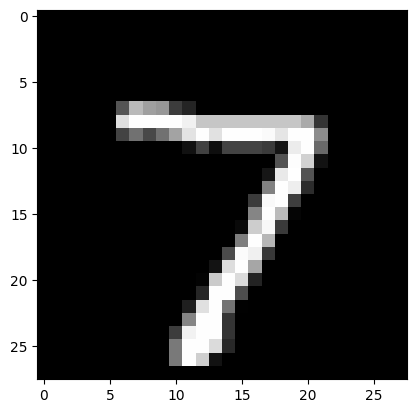

In [103]:
# Make predictions with the trained model
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [104]:
# Logits -> Prediction probabilities -> Prediction labels
model_pred_logits = model_gpu(test_data[0][0].unsqueeze(dim=0).to(device)) # make sure image is right shape + on right device
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7])

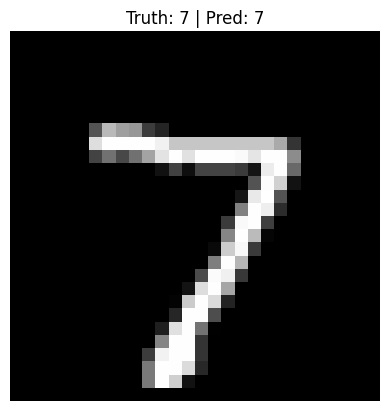

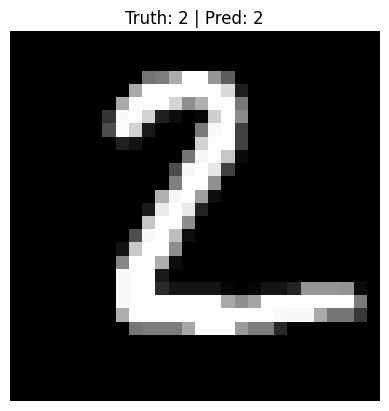

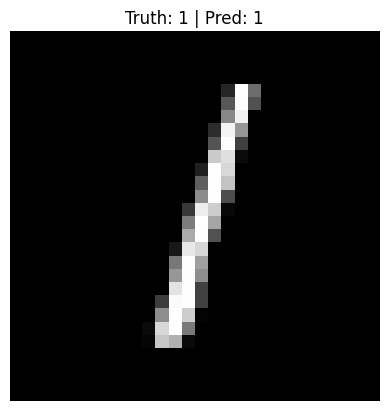

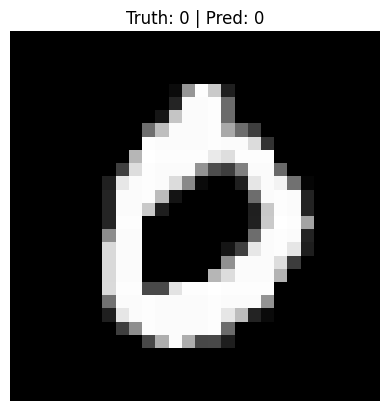

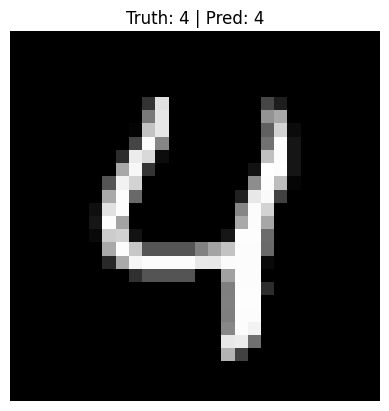

In [105]:
num_to_plot = 5
for i in range(num_to_plot):
  # Get image and labels from the test data
  img = test_data[i][0]
  label = test_data[i][1]

  # Make prediction on image
  model_pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
  plt.axis(False);

####7. Plot a confusion matrix with predictions vs truth labels

In [106]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


In [107]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher


0.22.0


In [108]:
# Make predictions across all test data
from tqdm.auto import tqdm
model_gpu.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = model_gpu(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

10000

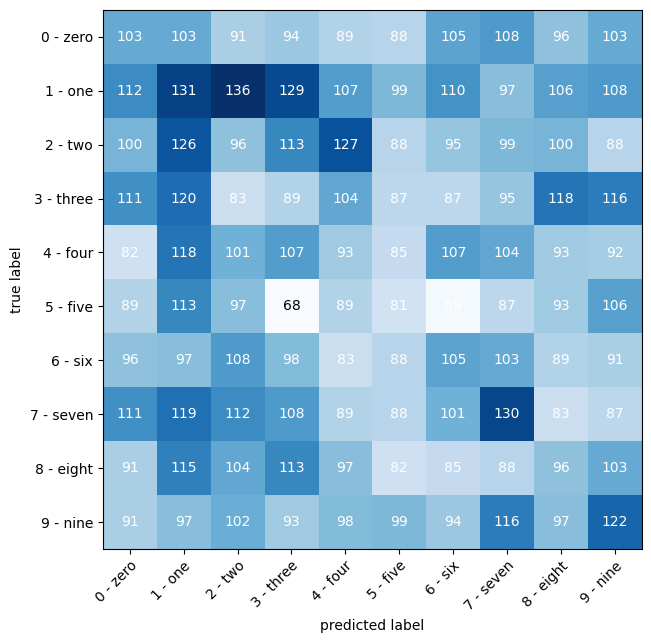

In [109]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

####. create ra random tensor `[1,3,64,64]` and pass it through `nn.Conv2d()`

In [110]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [111]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=2,
                       padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")


Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


#### Use a model similar to the trained model_2 from notebook 03 to make predictions on the test torchvision.datasets.FashionMNIST dataset.

In [112]:
# Download FashionMNIST train & test
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(root=".",
                                            download=True,
                                            train=True,
                                            transform=transforms.ToTensor())

fashion_mnist_test = datasets.FashionMNIST(root=".",
                                           train=False,
                                           download=True,
                                           transform=transforms.ToTensor())

len(fashion_mnist_train), len(fashion_mnist_test)

100%|██████████| 26421880/26421880 [00:02<00:00, 11232593.55it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 202672.64it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3779095.89it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4863125.45it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



(60000, 10000)

In [113]:
# Get the class names of the Fashion MNIST dataset
fashion_mnist_class_names = fashion_mnist_train.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [114]:
# Turn FashionMNIST datasets into dataloaders
from torch.utils.data import DataLoader

fashion_mnist_train_dataloader = DataLoader(fashion_mnist_train,
                                            batch_size=32,
                                            shuffle=True)

fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test,
                                           batch_size=32,
                                           shuffle=False)

len(fashion_mnist_train_dataloader), len(fashion_mnist_test_dataloader)

(1875, 313)

In [115]:
# model_2 is the same architecture as MNIST_model
model_2 = MNISTModelV1(input_shape=1,
                      hidden_units=10,
                      output_shape=10).to(device)
model_2

MNISTModelV1(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [117]:
# Setup loss and optimizer
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)


# Setup metrics
from tqdm.auto import tqdm
from torchmetrics import Accuracy

acc_fn = Accuracy(num_classes=len(fashion_mnist_class_names),task="multiclass").to(device)

# Setup training/testing loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss, test_loss_total = 0, 0
  train_acc, test_acc = 0, 0

  ### Training
  model_2.train()
  for batch, (X_train, y_train) in enumerate(fashion_mnist_train_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)

    # Forward pass and loss
    y_pred = model_2(X_train)
    loss = loss_fn(y_pred, y_train)
    train_loss += loss
    train_acc += acc_fn(y_pred, y_train)

    # Backprop and gradient descent
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Adjust the loss/acc (find the loss/acc per epoch)
  train_loss /= len(fashion_mnist_train_dataloader)
  train_acc /= len(fashion_mnist_train_dataloader)

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(fashion_mnist_test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      # Forward pass and loss
      y_pred_test = model_2(X_test)
      test_loss = loss_fn(y_pred_test, y_test)
      test_loss_total += test_loss

      test_acc += acc_fn(y_pred_test, y_test)

    # Adjust the loss/acc (find the loss/acc per epoch)
    test_loss /= len(fashion_mnist_test_dataloader)
    test_acc /= len(fashion_mnist_test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss_total:.3f} | Test acc: {test_acc:.2f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.422 | Train acc: 0.47 | Test loss: 219.637 | Test acc: 0.74
Epoch: 1 | Train loss: 0.577 | Train acc: 0.79 | Test loss: 165.248 | Test acc: 0.81
Epoch: 2 | Train loss: 0.464 | Train acc: 0.83 | Test loss: 140.657 | Test acc: 0.84
Epoch: 3 | Train loss: 0.415 | Train acc: 0.85 | Test loss: 127.468 | Test acc: 0.85
Epoch: 4 | Train loss: 0.386 | Train acc: 0.86 | Test loss: 121.659 | Test acc: 0.86


In [118]:
# Make predictions with trained model_2
test_preds = []
model_2.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(fashion_mnist_test_dataloader):
    y_logits = model_2(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)
    test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds).cpu() # matplotlib likes CPU
test_preds[:10], len(test_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [119]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
len(wrong_pred_indexes)

1411

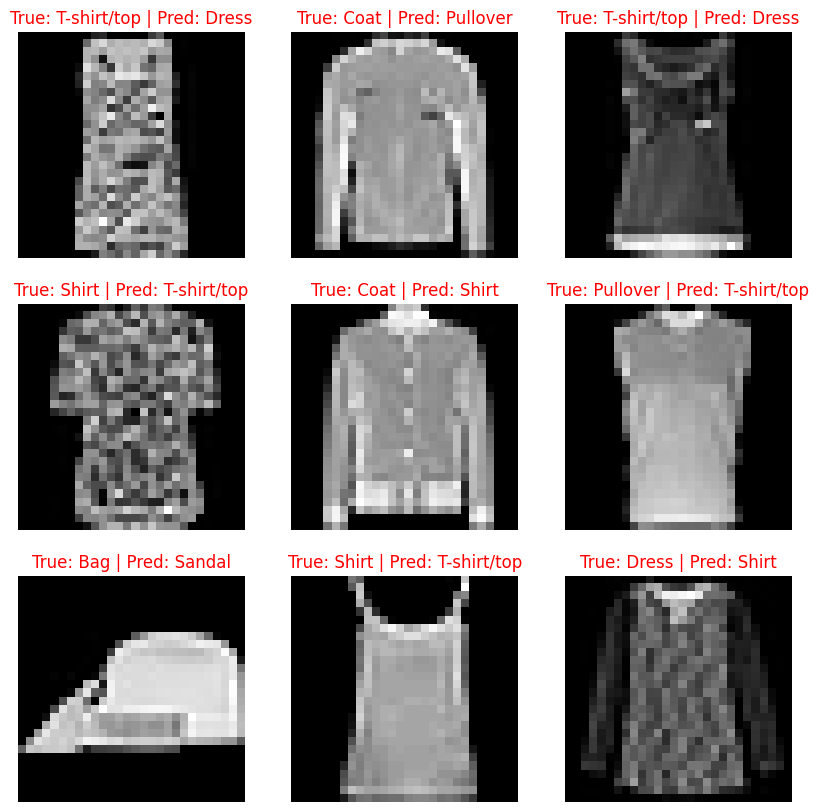

In [120]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = fashion_mnist_class_names[fashion_mnist_test[idx][1]]
  pred_label = fashion_mnist_class_names[test_preds[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);